In [23]:
import pandas as pd
import numpy as np
main = pd.read_csv('/Users/Klara/Desktop/statistika/SOC/SOCmain.csv')

In [24]:
main.head()

,Časová pečiatka,Pohlavie:,Vek:,"Mali ste počas Vášho štúdia na strednej/základnej škole priestor na hodinách (biológia) alebo vyhradenú hodinu, ktorá sa zaoberala zdravým sexuálnym životom, antikoncepciou, sexuálne prenosnými chorobami a ich prevenciou?",V akej podobe táto hodina bola?,Rozprávali ste sa otvorene na tému sexuálna výchova a zdravie doma?,"Myslíte si, že tému zdravý sexuálny život ovládate natoľko, že ste schopný/á viesť zdravý, plnohodnotný sexuálny život? (správna voľba antikoncepcie, prevencia sexuálne prenosných chorôb,...)",Riadite sa zásadou: prvý pohlavný styk až po svadbe?,V akom veku ste mali prvý pohlavný styk?,Aká je Vaša preferovaná forma antikoncepcie s partnerom?,"Použili ste Vy, alebo Vaša partnerka, niekedy núdzovú antikoncepciu? (,,tabletka po"" - väčšinou využívaná v prípade nechráneného pohlavného styku alebo zlyhaní antikoncepcie do 3-5 dní)","Myslíte si, že ste dostatočne informovaný/á o téme interrupcie? (ako prebiehajú, rôzne formy, legislatíva na Slovensku,...)","V súčasnosti sa na Slovensku čoraz viac diskutuje o sprísnení interrupčných práv. Súhlasíte s týmto návrhom zákona? (predĺženie čakacej doby na interrupciu z 2 na 4 dni, povinnosť dvoch znaleckých posudkov pred interrupciou zo zdravotných dôvodov, zákaz reklamy) celý návrh zákona: https://www.nrsr.sk/web/Dynamic/DocumentPreview.aspx?DocID=479948","Myslíte si, že by mala byť interrupčná tabletka legálna na Slovensku?","Poznáte niekoho z Vášho blízkeho okolia, kto podstúpil, alebo ste sama podstúpili, interrupciu?"
0,2020/12/10 10:00:11 PM SEČ,Žena,51,Nie,Vyhradená hodina v učebnom pláne na ZŠ;Vyhrade...,Skôr nie,Skôr áno,Nie,19-20,Metódy založené na znalosti plodnosti (neplodn...,Áno,Skôr nie,Nie,Áno,"Áno, poznám"
1,2020/12/10 10:05:29 PM SEČ,Žena,18,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr áno,Skôr áno,Nie,15-16,Antikoncepčné tabletky (s alebo bez obsahu est...,Áno,Skôr áno,Nie,Áno,Nie
2,2020/12/10 10:06:02 PM SEČ,Žena,19,Nie,Výklad na hodine biológie SŠ,Nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr nie,Neviem,Áno,Nie
3,2020/12/10 10:13:00 PM SEČ,Žena,18,"Áno, jednorázovo",Výklad na hodine biológie ZŠ,Áno,Skôr áno,Nie,17-18,Prerušovaná súlož,Áno,Skôr áno,Nie,Áno,"Áno, poznám"
4,2020/12/10 10:16:03 PM SEČ,Žena,17,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr áno,Nie,Áno,Nie


In [25]:
del main['Časová pečiatka']

In [26]:
korelacia = main
korelacia = korelacia[['Vek:','V akom veku ste mali prvý pohlavný styk?']]
korelacia

,Vek:,V akom veku ste mali prvý pohlavný styk?
0,51,19-20
1,18,15-16
2,19,ešte som nemal/a pohlavný styk
3,18,17-18
4,17,ešte som nemal/a pohlavný styk
...,...,...
301,16,ešte som nemal/a pohlavný styk
302,17,ešte som nemal/a pohlavný styk
303,18,ešte som nemal/a pohlavný styk
304,18,ešte som nemal/a pohlavný styk


In [27]:
korelacia.columns = ['vek','prvySex']
korelacia.head()

,vek,prvySex
0,51,19-20
1,18,15-16
2,19,ešte som nemal/a pohlavný styk
3,18,17-18
4,17,ešte som nemal/a pohlavný styk


In [28]:
print(korelacia.dtypes)

vek        object
prvySex    object
dtype: object


In [29]:
korelacia.at[291,'vek']=60

In [30]:
korelacia['vek'] = pd.to_numeric(korelacia['vek'], errors='coerce')

<ipython-input-30-49fa3a6112fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korelacia['vek'] = pd.to_numeric(korelacia['vek'], errors='coerce')


In [31]:
print(korelacia.dtypes)
korelacia

vek         int64
prvySex    object
dtype: object


,vek,prvySex
0,51,19-20
1,18,15-16
2,19,ešte som nemal/a pohlavný styk
3,18,17-18
4,17,ešte som nemal/a pohlavný styk
...,...,...
301,16,ešte som nemal/a pohlavný styk
302,17,ešte som nemal/a pohlavný styk
303,18,ešte som nemal/a pohlavný styk
304,18,ešte som nemal/a pohlavný styk


In [32]:
# indexNoSex = korelacia[korelacia['prvySex'] == 'ešte som nemal/a pohlavný styk' ].index
# korelacia.drop(indexNoSex , inplace=True)

In [33]:
len(korelacia[korelacia['prvySex'].str.contains('ešte som nemal/a pohlavný styk')])

197

In [34]:
indexNoSex = list(korelacia[korelacia['prvySex'].str.contains('ešte som nemal/a pohlavný styk')].index)

In [35]:
type(indexNoSex)

list

In [36]:
korelacia = korelacia.drop(indexNoSex)

In [37]:
korelacia

,vek,prvySex
0,51,19-20
1,18,15-16
3,18,17-18
5,19,15-16
8,18,17-18
...,...,...
276,16,15-16
285,17,17-18
287,19,17-18
291,60,17-18


In [38]:
len(korelacia)

109

In [42]:
korelacia['prvySex'] = np.where((korelacia.prvySex == '19-20'),float(19.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == 'do 14'),float(14.0),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '15-16'),float(15.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '17-18'),float(17.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '21-25'),float(23.0),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '26 a viac'),float(26.0),korelacia.prvySex)

In [44]:
korelacia

,vek,prvySex
0,51,19.5
1,18,15.5
3,18,17.5
5,19,15.5
8,18,17.5
...,...,...
276,16,15.5
285,17,17.5
287,19,17.5
291,60,17.5


In [45]:
korelacia['prvySex'] = pd.to_numeric(korelacia['prvySex'], errors='coerce')

In [46]:
print(korelacia.dtypes)

vek          int64
prvySex    float64
dtype: object


In [47]:
korelacia

,vek,prvySex
0,51,19.5
1,18,15.5
3,18,17.5
5,19,15.5
8,18,17.5
...,...,...
276,16,15.5
285,17,17.5
287,19,17.5
291,60,17.5


# <strong><span style="color:red">Koniec nastaveni</span></strong>
---

<strong>
    Korelacia</strong>

In [48]:
grafKorelacia = korelacia.corr()

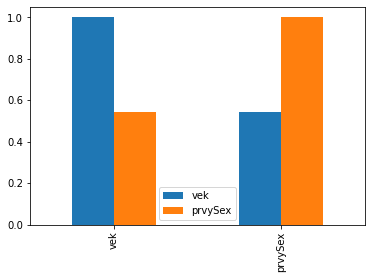

In [50]:
korelacia.corr().plot(kind='bar')

---
<strong>
    regresia</strong>

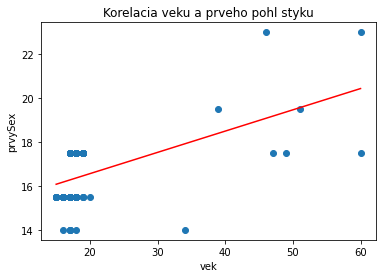

In [51]:
import matplotlib.pyplot as plt
plt.scatter(korelacia['vek'],korelacia['prvySex'])
plt.title('Korelacia veku a prveho pohl styku')
plt.xlabel('vek')
plt.ylabel('prvySex')
plt.plot(np.unique(korelacia['vek']), np.poly1d(np.polyfit(korelacia['vek'], korelacia['prvySex'], 1))(np.unique(korelacia['vek'])), color='red')

In [52]:
print(np.corrcoef(korelacia['vek'], korelacia['prvySex']))

[[1.         0.54579053]
 [0.54579053 1.        ]]


---
<strong>
    Box Plot</strong>

In [55]:
korelacia.sort_values(by=['prvySex'])

,vek,prvySex
82,17,14.0
238,34,14.0
25,18,14.0
249,17,14.0
250,17,14.0
...,...,...
138,17,17.5
167,39,19.5
0,51,19.5
235,46,23.0


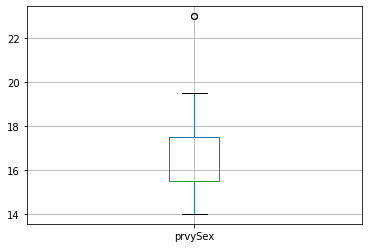

In [56]:
BPO = korelacia.boxplot(column=['prvySex'])

---
<strong>
    median</strong>

In [57]:
korelacia['vek'].median()

18.0

In [58]:
korelacia['prvySex'].median()

15.5

In [60]:
korelacia.mode()

,vek,prvySex
0,18,17.5
